In [3]:
import os
import numpy as np
import rowan
import hoomd
import rowan
import pickle
import PIL
import fresnel
import cv2
from cmeutils.visualize import FresnelGSD
from src.rigid_simulation import create_rigid_simulation, rigid_energy_forces
from src.quaternions import rotate_quaternion, dr_orientation_angles

In [4]:
n_rigids = 2
rel_const_pos = np.load('../assets/rel_const_pos.npy')
init_gsd = '../assets/rigid_init_2.gsd'
with open('../assets/pps_ff.pkl', 'rb') as f:
    pps_ff = pickle.load(f)


In [5]:
R_range = [0.5, 4.5]
R_split = 200
R_step = (R_range[1] - R_range[0])/R_split
print(R_step)
first_rigid_pos = [-1, 0, 0]
second_rigid_pos = []
for i in range(R_split):
    second_rigid_pos.append([first_rigid_pos[0] +  (0.5 + R_step * i), 0. , 0.])

0.02


### 1. side-to-side with S aligned (tail-tail)

In [121]:
logs = {}
pos1 = np.array(first_rigid_pos)
second_rigid_pos = np.asarray(second_rigid_pos)

In [122]:
q1 = [1, 0, 0, 0]
q2= [1, 0, 0,0]
r = []
forces = []
energies = []
for pos2 in second_rigid_pos:
    rigid_simulation = create_rigid_simulation(orientations=[q1, q2], positions=[pos1, pos2],
                                               n_rigids=n_rigids, rel_const_pos=rel_const_pos,
                                              pps_ff=pps_ff, init_gsd=init_gsd)
    energy, force = rigid_energy_forces(rigid_simulation, n_rigids)
    r.append(np.around(np.linalg.norm(pos2-pos1), 3))
    forces.append(force)
    energies.append(energy)
logs['side-side-tail-tail'] = {'dr': r, 
                         'q1': q1,
                         'q2' : q2,
                         'energy': energies,
                         'forces': forces
                        }

### 2.side-to-side with S opposite (tail-head)

In [123]:
q1 = [1, 0, 0, 0]
q2= rotate_quaternion(q1, theta=np.pi, axis='x')
r = []
forces = []
energies = []
for pos2 in second_rigid_pos:
    rigid_simulation = create_rigid_simulation(orientations=[q1, q2], positions=[pos1, pos2],
                                               n_rigids=n_rigids, rel_const_pos=rel_const_pos,
                                              pps_ff=pps_ff, init_gsd=init_gsd)
    energy, force = rigid_energy_forces(rigid_simulation, n_rigids)
    r.append(np.around(np.linalg.norm(pos2-pos1), 3))
    forces.append(force)
    energies.append(energy)
logs['side-side-tail-head'] = {'dr': r, 
                         'q1': q1,
                         'q2' : q2,
                         'energy': energies,
                         'forces': forces
                        }

### 3. face-to-face S aligned (tail-tail)

In [124]:
q1 = rotate_quaternion([1, 0, 0, 0], theta=np.pi/2, axis='z')
q2= rotate_quaternion([1, 0, 0, 0], theta=np.pi/2, axis='z')
r = []
forces = []
energies = []
for pos2 in second_rigid_pos:
    rigid_simulation = create_rigid_simulation(orientations=[q1, q2], positions=[pos1, pos2],
                                               n_rigids=n_rigids, rel_const_pos=rel_const_pos,
                                              pps_ff=pps_ff, init_gsd=init_gsd)
    energy, force = rigid_energy_forces(rigid_simulation, n_rigids)
    r.append(np.around(np.linalg.norm(pos2-pos1), 3))
    forces.append(force)
    energies.append(energy)
logs['face-face-tail-tail'] = {'dr': r, 
                         'q1': q1,
                         'q2' : q2,
                         'energy': energies,
                         'forces': forces
                        }

### 4. face-to-face S opposite (tail-head)

In [125]:
q1 = rotate_quaternion([1, 0, 0, 0], theta=np.pi/2, axis='z')
q2= rotate_quaternion(q1, theta=np.pi, axis='x')
r = []
forces = []
energies = []
for pos2 in second_rigid_pos:
    rigid_simulation = create_rigid_simulation(orientations=[q1, q2], positions=[pos1, pos2],
                                               n_rigids=n_rigids, rel_const_pos=rel_const_pos,
                                              pps_ff=pps_ff, init_gsd=init_gsd)
    energy, force = rigid_energy_forces(rigid_simulation, n_rigids)
    r.append(np.around(np.linalg.norm(pos2-pos1), 3))
    forces.append(force)
    energies.append(energy)
logs['face-face-tail-head'] = {'dr': r, 
                         'q1': q1,
                         'q2' : q2,
                         'energy': energies,
                         'forces': forces
                        }

### 5. side-to-face s aligned (tail-tail)

In [126]:
q1 = [1, 0, 0, 0]
q2= rotate_quaternion(q1, theta=np.pi/2, axis='z')
r = []
forces = []
energies = []
for pos2 in second_rigid_pos:
    rigid_simulation = create_rigid_simulation(orientations=[q1, q2], positions=[pos1, pos2],
                                               n_rigids=n_rigids, rel_const_pos=rel_const_pos,
                                              pps_ff=pps_ff, init_gsd=init_gsd)
    energy, force = rigid_energy_forces(rigid_simulation, n_rigids)
    r.append(np.around(np.linalg.norm(pos2-pos1), 3))
    forces.append(force)
    energies.append(energy)
logs['side-face-tail-tail'] = {'dr': r, 
                         'q1': q1,
                         'q2' : q2,
                         'energy': energies,
                         'forces': forces
                        }

### 6. side-to-face s opposite (tail-head)

In [127]:
q1 = [1, 0, 0, 0]
q2= rotate_quaternion(rotate_quaternion(q1, theta=np.pi/2, axis='z'), theta=np.pi, axis='x')
r = []
forces = []
energies = []
for pos2 in second_rigid_pos:
    rigid_simulation = create_rigid_simulation(orientations=[q1, q2], positions=[pos1, pos2],
                                               n_rigids=n_rigids, rel_const_pos=rel_const_pos,
                                              pps_ff=pps_ff, init_gsd=init_gsd)
    energy, force = rigid_energy_forces(rigid_simulation, n_rigids)
    r.append(np.around(np.linalg.norm(pos2-pos1), 3))
    forces.append(force)
    energies.append(energy)
logs['side-face-tail-head'] = {'dr': r, 
                         'q1': q1,
                         'q2' : q2,
                         'energy': energies,
                         'forces': forces
                        }

### 7. end-to-end s aligned (tail-head)

In [128]:
q1 = rotate_quaternion(rotate_quaternion(q=[1, 0, 0, 0], theta=np.pi/2, axis='y'), theta=np.pi/2, axis='x')
q2= q1
r = []
forces = []
energies = []
for pos2 in second_rigid_pos:
    rigid_simulation = create_rigid_simulation(orientations=[q1, q2], positions=[pos1, pos2],
                                               n_rigids=n_rigids, rel_const_pos=rel_const_pos,
                                              pps_ff=pps_ff, init_gsd=init_gsd)
    energy, force = rigid_energy_forces(rigid_simulation, n_rigids)
    r.append(np.around(np.linalg.norm(pos2-pos1), 3))
    forces.append(force)
    energies.append(energy)
logs['end-end-tail-head'] = {'dr': r, 
                         'q1': q1,
                         'q2' : q2,
                         'energy': energies,
                         'forces': forces
                        }

### 8. end-to-end s opposite (head-head)

In [129]:
q1 = rotate_quaternion(rotate_quaternion(q=[1, 0, 0, 0], theta=np.pi/2, axis='y'), theta=np.pi/2, axis='x')
q2= rotate_quaternion(q1, theta=np.pi, axis='y')
r = []
forces = []
energies = []
for pos2 in second_rigid_pos:
    rigid_simulation = create_rigid_simulation(orientations=[q1, q2], positions=[pos1, pos2],
                                               n_rigids=n_rigids, rel_const_pos=rel_const_pos,
                                              pps_ff=pps_ff, init_gsd=init_gsd)
    energy, force = rigid_energy_forces(rigid_simulation, n_rigids)
    r.append(np.around(np.linalg.norm(pos2-pos1), 3))
    forces.append(force)
    energies.append(energy)
logs['end-end-head-head'] = {'dr': r, 
                         'q1': q1,
                         'q2' : q2,
                         'energy': energies,
                         'forces': forces
                        }

### 9. end-to-end s close (tail-tail)

In [130]:
q2= rotate_quaternion(rotate_quaternion(q=[1, 0, 0, 0], theta=np.pi/2, axis='y'), theta=np.pi/2, axis='x')
q1 =  rotate_quaternion(q2, theta=np.pi, axis='y')
r = []
forces = []
energies = []
for pos2 in second_rigid_pos:
    rigid_simulation = create_rigid_simulation(orientations=[q1, q2], positions=[pos1, pos2],
                                               n_rigids=n_rigids, rel_const_pos=rel_const_pos,
                                              pps_ff=pps_ff, init_gsd=init_gsd)
    energy, force = rigid_energy_forces(rigid_simulation, n_rigids)
    r.append(np.around(np.linalg.norm(pos2-pos1), 3))
    forces.append(force)
    energies.append(energy)
logs['end-end-tail-tail'] = {'dr': r, 
                         'q1': q1,
                         'q2' : q2,
                         'energy': energies,
                         'forces': forces
                        }

### 10. side-to-end s far (tail-head)

In [131]:
q1 = rotate_quaternion(rotate_quaternion(q=[1, 0, 0, 0], theta=np.pi/2, axis='y'), theta=np.pi/2, axis='x')
q2= [1, 0, 0, 0]
r = []
forces = []
energies = []
for pos2 in second_rigid_pos:
    rigid_simulation = create_rigid_simulation(orientations=[q1, q2], positions=[pos1, pos2],
                                               n_rigids=n_rigids, rel_const_pos=rel_const_pos,
                                              pps_ff=pps_ff, init_gsd=init_gsd)
    energy, force = rigid_energy_forces(rigid_simulation, n_rigids)
    r.append(np.around(np.linalg.norm(pos2-pos1), 3))
    forces.append(force)
    energies.append(energy)
logs['side-end-tail-head'] = {'dr': r, 
                         'q1': q1,
                         'q2' : q2,
                         'energy': energies,
                         'forces': forces
                        }

### 11. side-to-end s close (tail-tail)

In [132]:
q1 = rotate_quaternion(rotate_quaternion(q=[1, 0, 0, 0], theta=np.pi/2, axis='y'), theta=np.pi/2, axis='x')
q1 = rotate_quaternion(q1, theta=np.pi, axis='y')
q2= [1, 0, 0, 0]
r = []
forces = []
energies = []
for pos2 in second_rigid_pos:
    rigid_simulation = create_rigid_simulation(orientations=[q1, q2], positions=[pos1, pos2],
                                               n_rigids=n_rigids, rel_const_pos=rel_const_pos,
                                              pps_ff=pps_ff, init_gsd=init_gsd)
    energy, force = rigid_energy_forces(rigid_simulation, n_rigids)
    r.append(np.around(np.linalg.norm(pos2-pos1), 3))
    forces.append(force)
    energies.append(energy)
logs['side-end-tail-tail'] = {'dr': r, 
                         'q1': q1,
                         'q2' : q2,
                         'energy': energies,
                         'forces': forces
                        }

### 12. face-to-end s far (tail-head)

In [133]:
q1 = rotate_quaternion(rotate_quaternion(q=[1, 0, 0, 0], theta=np.pi/2, axis='y'), theta=np.pi/2, axis='x')
q2=  rotate_quaternion([1, 0, 0, 0], theta=np.pi/2, axis='z')
r = []
forces = []
energies = []
for pos2 in second_rigid_pos:
    rigid_simulation = create_rigid_simulation(orientations=[q1, q2], positions=[pos1, pos2],
                                               n_rigids=n_rigids, rel_const_pos=rel_const_pos,
                                              pps_ff=pps_ff, init_gsd=init_gsd)
    energy, force = rigid_energy_forces(rigid_simulation, n_rigids)
    r.append(np.around(np.linalg.norm(pos2-pos1), 3))
    forces.append(force)
    energies.append(energy)
logs['face-end-tail-head'] = {'dr': r, 
                         'q1': q1,
                         'q2' : q2,
                         'energy': energies,
                         'forces': forces
                        }

### 13. face-to-end s close (tail-tail)

In [134]:
q1 = rotate_quaternion(rotate_quaternion(q=[1, 0, 0, 0], theta=np.pi/2, axis='y'), theta=np.pi/2, axis='x')
q1 = rotate_quaternion(q1, theta=np.pi, axis='y')
q2 = rotate_quaternion([1, 0, 0, 0], theta=np.pi/2, axis='z')
r = []
forces = []
energies = []
for pos2 in second_rigid_pos:
    rigid_simulation = create_rigid_simulation(orientations=[q1, q2], positions=[pos1, pos2],
                                               n_rigids=n_rigids, rel_const_pos=rel_const_pos,
                                              pps_ff=pps_ff, init_gsd=init_gsd)
    energy, force = rigid_energy_forces(rigid_simulation, n_rigids)
    r.append(np.around(np.linalg.norm(pos2-pos1), 3))
    forces.append(force)
    energies.append(energy)
logs['face-end-tail-tail'] = {'dr': r, 
                         'q1': q1,
                         'q2' : q2,
                         'energy': energies,
                         'forces': forces
                        }

### Draw R-E plots

In [136]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [137]:
color = cm.rainbow(np.linspace(0, 1, 13))

In [143]:

marker = [',', 'v', '+', '.','>',  'o', '*', '^', 'h', 'X', 'd', '<','s']

In [62]:
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

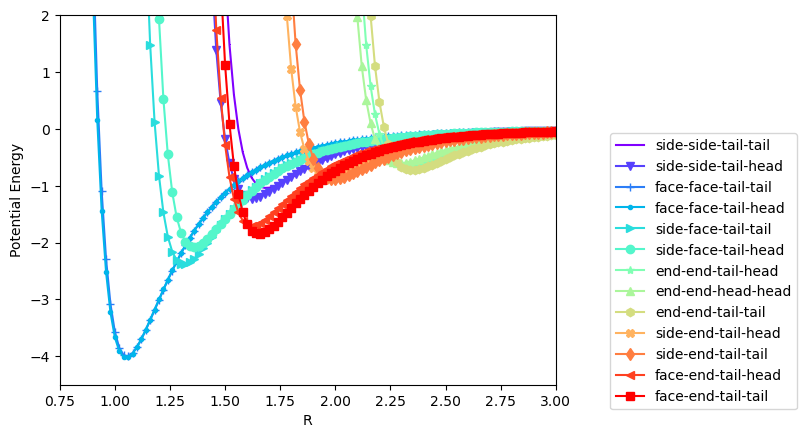

In [144]:
lines = []
for i, (k, v) in enumerate(logs.items()):
    r = v['dr']
    energy = v['energy']
    plt.plot(r, np.asarray(energy)/2, label=k, c=color[i], marker=marker[i])
    
# import matplotlib.lines
# from matplotlib.transforms import Bbox, TransformedBbox
# from matplotlib.legend_handler import HandlerBase
# from matplotlib.image import BboxImage
# class HandlerLineImage(HandlerBase):

#     def __init__(self, path, space=15, offset = 10 ):
#         self.space=space
#         self.offset=offset
#         self.image_data = plt.imread(path)        
#         super(HandlerLineImage, self).__init__()

#     def create_artists(self, legend, orig_handle,
#                        xdescent, ydescent, width, height, fontsize, trans):

#         l = matplotlib.lines.Line2D([xdescent+self.offset,xdescent+(width-self.space)/3.+self.offset],
#                                      [ydescent+height/2., ydescent+height/2.])
#         l.update_from(orig_handle)
#         l.set_clip_on(False)
#         l.set_transform(trans)

#         bb = Bbox.from_bounds(xdescent +(width+self.space)/3.+self.offset,
#                               ydescent,
#                               height*self.image_data.shape[1]/self.image_data.shape[0],
#                               height)

#         tbb = TransformedBbox(bb, trans)
#         image = BboxImage(tbb)
#         image.set_data(self.image_data)

#         self.update_prop(image, orig_handle, legend)
#         return [l,image]

# handler_map = {}
# keys = list(logs.keys())
# for i, line in enumerate(lines):
#     handler_map[line] = HandlerLineImage(f'snapshots/{keys[i]}.png')
plt.ylim(-4.5, 2)
plt.xlim(0.75, 3)
plt.xlabel('R')
plt.ylabel('Potential Energy')
plt.legend(
   # handler_map=handler_map, 
   #  handlelength=2, labelspacing=0.0, fontsize=18, borderpad=0.15,  
   #  handletextpad=0.2, borderaxespad=0.15,
    bbox_to_anchor=(1.5, 0.7))


In [ ]:
plt.legend(lines,
   handler_map={ line: HandlerLineImage("icon1.png"), line2: HandlerLineImage("icon2.png")}, 
   handlelength=2, labelspacing=0.0, fontsize=36, borderpad=0.15, loc=2, 
    handletextpad=0.2, borderaxespad=0.15)

### Find Lpar and Lperp

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [26]:
def lennard_jones_potential(r, epsilon, sigma):
    """
    Calculate the Lennard-Jones potential for a given distance r.

    Parameters:
    r (float): Distance between particles
    epsilon (float): Depth of the potential well
    sigma (float): Finite distance at which the inter-particle potential is zero

    Returns:
    float: Lennard-Jones potential at distance r
    """
    term1 = (sigma / r) ** 12
    term2 = (sigma / r) ** 6
    potential = 4 * epsilon * (term1 - term2)
    return potential

### Case 1: Lpar = avg of end-end sigmas

In [173]:
ydata = np.asarray(logs['face-face-tail-tail']['energy'])
xdata = np.asarray(logs['face-face-tail-tail']['dr'])
limit_idx = np.where(ydata<5)[0]

In [174]:
eps = np.min(ydata)/2
eps

-4.0018322414954035

In [175]:
popt, pcov = curve_fit(lennard_jones_potential, xdata[limit_idx], ydata[limit_idx])

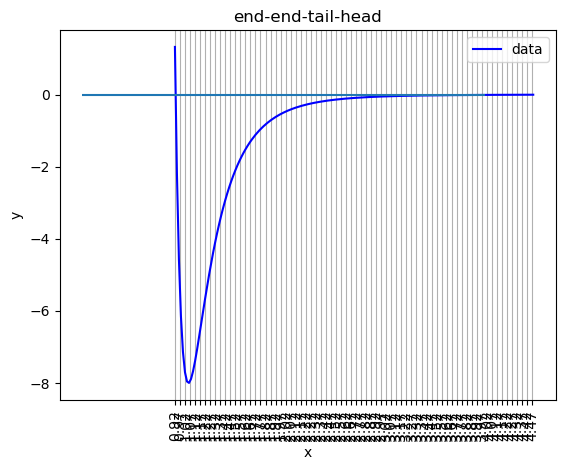

In [176]:
# plt.plot(xdata[limit_idx], lennard_jones_potential(xdata[limit_idx], *popt), 'r-',
#          label='fit: eps=%5.3f, sigma=%5.3f' % tuple(popt))
plt.plot(xdata[limit_idx], ydata[limit_idx], 'b-', label='data')
plt.hlines(y=0, xmin=0, xmax=4)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.title('end-end-tail-head')
plt.xticks(np.arange(np.min(xdata[limit_idx]), np.max(xdata[limit_idx]), step=0.05), rotation ='vertical') 
plt.gca().xaxis.grid(True)
plt.show()

In [177]:
np.arange(np.min(xdata[limit_idx]), np.max(xdata[limit_idx]), step=0.05)

array([0.92, 0.97, 1.02, 1.07, 1.12, 1.17, 1.22, 1.27, 1.32, 1.37, 1.42,
       1.47, 1.52, 1.57, 1.62, 1.67, 1.72, 1.77, 1.82, 1.87, 1.92, 1.97,
       2.02, 2.07, 2.12, 2.17, 2.22, 2.27, 2.32, 2.37, 2.42, 2.47, 2.52,
       2.57, 2.62, 2.67, 2.72, 2.77, 2.82, 2.87, 2.92, 2.97, 3.02, 3.07,
       3.12, 3.17, 3.22, 3.27, 3.32, 3.37, 3.42, 3.47, 3.52, 3.57, 3.62,
       3.67, 3.72, 3.77, 3.82, 3.87, 3.92, 3.97, 4.02, 4.07, 4.12, 4.17,
       4.22, 4.27, 4.32, 4.37, 4.42, 4.47])

In [ ]:
-1.